# Training a Simple Graph Neural Network on the Proteins Dataset

In this notebook we will be training a simple Graph Neural Network on the Protein Dataset. Even with such a simple model we should still be able to obtain about 70% accuracy

In [1]:
import torch
torch.manual_seed(42)

## Loading the Data

Let's first load the data with torch_geometric. We can see that there are a total of 113 proteins and each graph has about 40 nodes. There are only 2 classes so this is a binary classication problem.

In [2]:
from torch_geometric.datasets import TUDataset
proteins_dataset = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')
num_graphs = len(proteins_dataset)
print(f'Number of graphs: {num_graphs}')
print(f"Average number of nodes: {(proteins_dataset._data.num_nodes / num_graphs):.1f}")
print(f"Average number of edges: {(proteins_dataset._data.num_edges / num_graphs):.1f}")
print(f"Number of classes: {proteins_dataset.num_classes}")
print(f"Number of node features: {proteins_dataset.num_node_features}")

Number of graphs: 1113
Average number of nodes: 39.1
Average number of edges: 145.6
Number of classes: 2
Number of node features: 3


### Visualizing the Data
We can also use networkx to get a sense of what each graph looks like

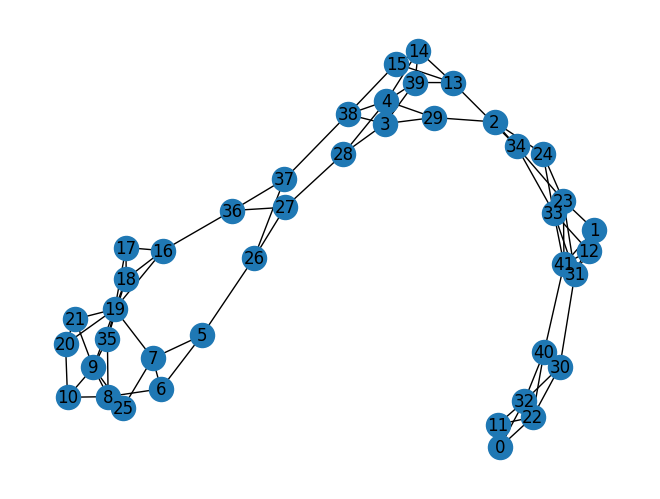

In [3]:
import networkx as nx

edges = proteins_dataset[0].edge_index.numpy().T

G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

## Training the Model
Finally we split data into train, test, and validation sets and train the simple GCN model, the source code of which is in the graph_neural_networks/models directory 

In [4]:
from graph_neural_networks.utils import split_dataset
train_dataset, val_dataset, test_dataset = split_dataset(proteins_dataset)

In [10]:
from graph_neural_networks.models import GCN
from graph_neural_networks.utils import train, test
model = GCN(in_channels=proteins_dataset.num_node_features, hidden_channels=64, out_channels=1) # 1 for binary classification

train(model, train_dataset, verbose=False)

train_accuracy = test(model, train_dataset)
test_accuracy = test(model, test_dataset)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.6876404494382022
Test Accuracy: 0.7142857142857143


### GraphConv Layers
We can also try using [GraphConv Layers](https://pytorch-geometric.readthedocs.io/en/stable/generated/torch_geometric.nn.conv.GraphConv.html#torch_geometric.nn.conv.GraphConv) which include residual connections and have a slightly different normalization.

In [11]:
from graph_neural_networks.models import GraphConvNet

model_graph_conv_net = GraphConvNet(in_channels=proteins_dataset.num_node_features, hidden_channels=64, out_channels=1) # 1 for binary classification

train(model_graph_conv_net, train_dataset, verbose=False)

train_accuracy = test(model_graph_conv_net, train_dataset)
test_accuracy = test(model_graph_conv_net, test_dataset)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.6651685393258427
Test Accuracy: 0.6517857142857143


## Conclusion
The graph nueral network achieves a little over 70% accuracy depending on the seed. Look at some of the other examples for some better performing models